In [1]:
%matplotlib inline
from __future__ import print_function, division
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data


In [2]:
data_dir = '../Day3_MNIST/mnist'
fake_data = False

In [3]:
mnist = input_data.read_data_sets(data_dir,
                                  one_hot=True,
                                  fake_data=fake_data)


Extracting ../Day3_MNIST/mnist/train-images-idx3-ubyte.gz
Extracting ../Day3_MNIST/mnist/train-labels-idx1-ubyte.gz
Extracting ../Day3_MNIST/mnist/t10k-images-idx3-ubyte.gz
Extracting ../Day3_MNIST/mnist/t10k-labels-idx1-ubyte.gz


In [4]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f3d7329a050>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f3d60929790>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f3d60929750>)

In [5]:
mnist.train

In [6]:
mnist.test

In [7]:
mnist.test.images.shape

(10000, 784)

In [8]:
mnist.test.images.dtype

dtype('float32')

In [9]:
mnist.test.labels.shape

(10000, 10)

In [10]:
mnist.test.labels.dtype

dtype('float64')

In [11]:
mnist.test.labels

array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [12]:
mnist.test.labels[::]

array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [13]:
# create sprite for mnist.test

In [14]:
import matplotlib
import matplotlib.pyplot as plt

In [15]:
colors = np.array(matplotlib.colors.hsv_to_rgb([(n * 0.1,0.5,0.5)
                  for n in range(10)]) * 255,dtype=np.uint8)
colors

array([[127,  63,  63],
       [127, 102,  63],
       [114, 127,  63],
       [ 76, 127,  63],
       [ 63, 127,  89],
       [ 63, 127, 127],
       [ 63,  89, 127],
       [ 76,  63, 127],
       [114,  63, 127],
       [127,  63, 101]], dtype=uint8)

In [16]:
t_images = mnist.test.images.reshape([-1,28,28])
t_labels = np.argmax(mnist.test.labels,-1)
sprite_img = np.zeros([2800,2800,3],dtype=np.float32)
for y in xrange(100):
    for x in xrange(100):
        colr  = colors[int(t_labels[x+y*100])]    # shape (3,)
        t_img_bw = t_images[x+y*100]                 # shape: (28,28), value=[0.0..1.0]
        t_img_c  = np.zeros([28,28,3],dtype=np.float32)
        t_img_c[t_img_bw <= 0,:] = colr
        sprite_img[x*28:x*28+28,y*28:y*28+28,:] = t_img_c

In [17]:
plt.imsave('sprite.png',sprite_img)

In [18]:
from IPython.display import display, Image

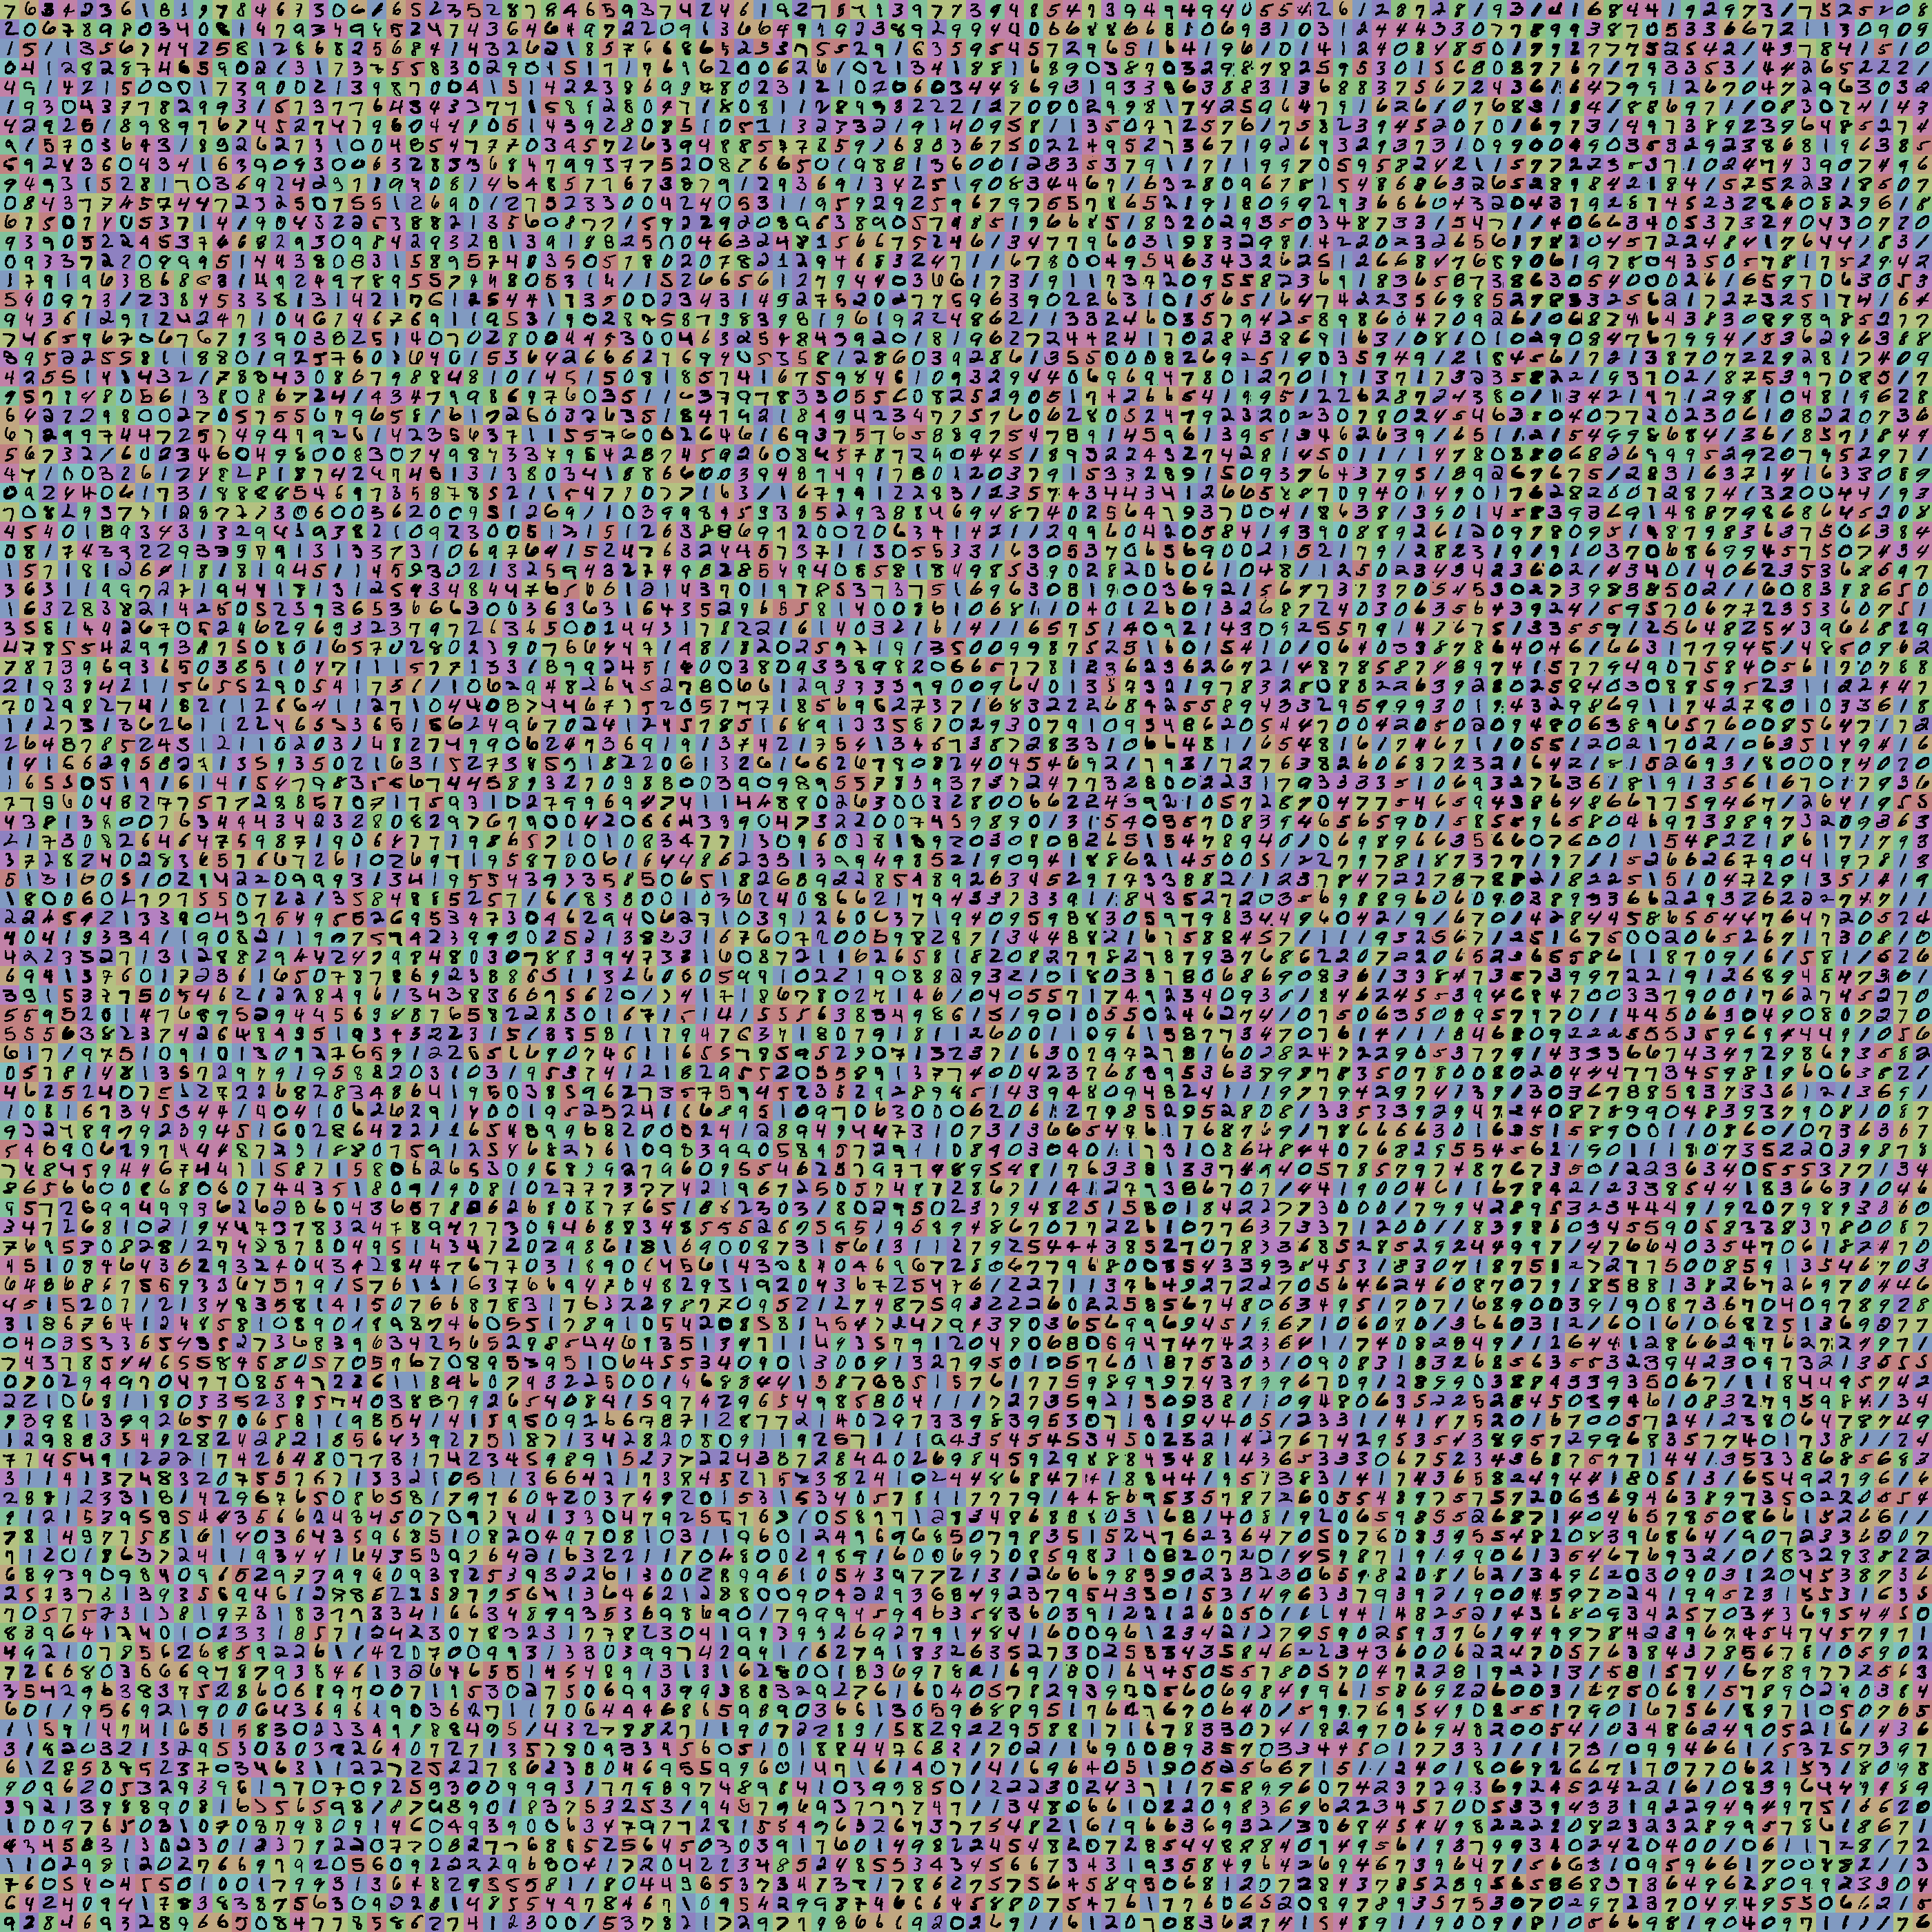

In [19]:
display(Image('sprite.png'))